In [1]:
# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df['Dataset'].unique()

array([1, 2], dtype=int64)

In [6]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")

Unique values in 'Age':
[65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90]


Unique values in 'Gender':
['Female' 'Male']


Unique values in 'Total_Bilirubin':
[ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8  5.5
 20.2 27.7 11.1 10.2 42.8 15.2 16.6 17.3 22.5 16.7  7.7 15.6 12.1 25.
 15. ]


Unique values in 'Direct_Bilirubin':
[ 0.1  5.5  4.1  0.4  2.   0.7  0.2  0.3  1.3  0.8  0.5  1. 

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

#female = 0, male = 1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [9]:
df["Albumin_and_Globulin_Ratio"] = df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

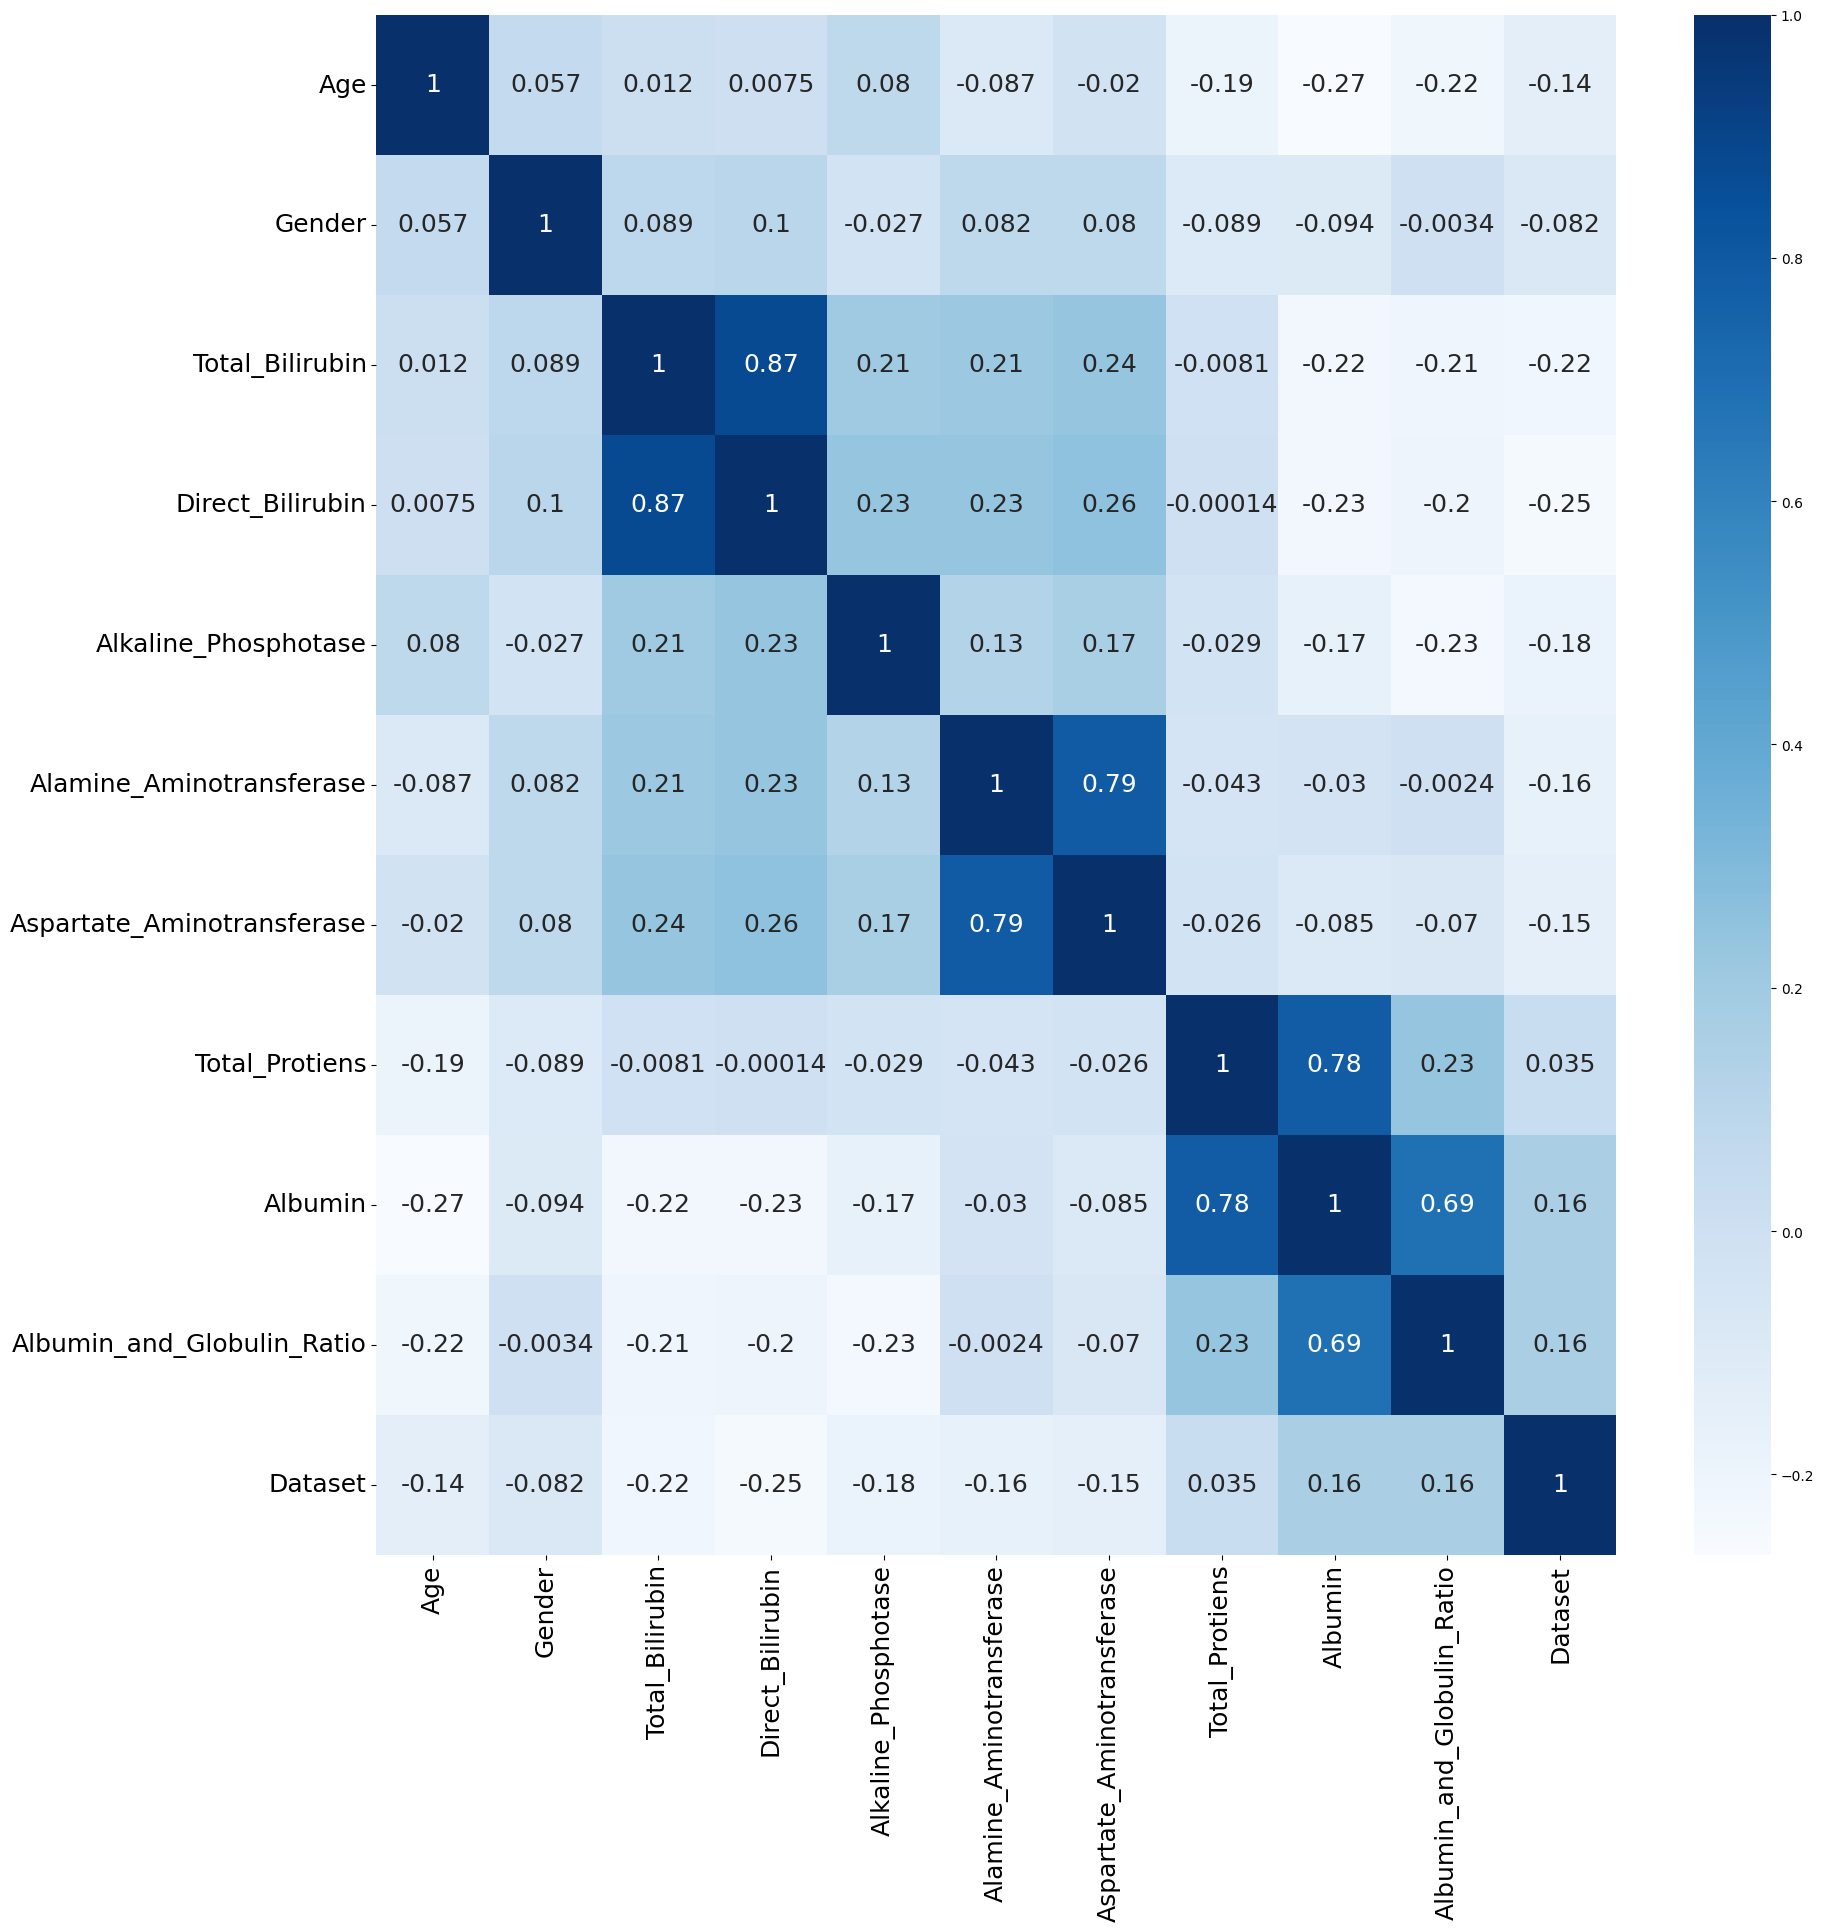

In [10]:
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues', annot_kws={"size": 18})

plt.xticks(fontsize=18)  # Increase x-axis label size
plt.yticks(fontsize=18)  # Increase y-axis label size
plt.show()


In [11]:
df = df.astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    float64
 1   Gender                      583 non-null    float64
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    float64
 5   Alamine_Aminotransferase    583 non-null    float64
 6   Aspartate_Aminotransferase  583 non-null    float64
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    float64
dtypes: float64(11)
memory usage: 50.2 KB


In [12]:
# Convert all columns to numeric, drop rows where conversion fails
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0
...,...,...,...,...,...,...,...,...,...,...,...
578,60.0,1.0,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,2.0
579,40.0,1.0,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,1.0
580,52.0,1.0,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,1.0
581,31.0,1.0,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1.0


In [23]:
X = df.drop(['Dataset'], axis=1)
y = df[['Dataset']]

In [24]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [25]:
print("original", y['Dataset'].value_counts())
print("oversampled",y_resampled['Dataset'].value_counts())

original 1.0    416
2.0    167
Name: Dataset, dtype: int64
oversampled 1.0    416
2.0    416
Name: Dataset, dtype: int64


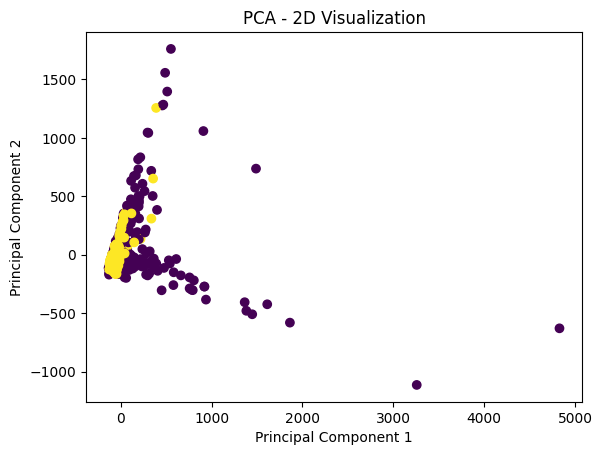

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'X' is your features DataFrame
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

y_values = y_resampled.squeeze()

# Plot the PCA-transformed version of the data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_values, cmap='viridis')  # Use 'c=y' for classification
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Visualization')
plt.show()


In [26]:
print("original", y['Dataset'].value_counts())
print("oversampled",y_resampled['Dataset'].value_counts())

original 1.0    416
2.0    167
Name: Dataset, dtype: int64
oversampled 1.0    416
2.0    416
Name: Dataset, dtype: int64


In [27]:
# X_resampled = X_resampled.to_numpy()
# y_resampled = y_resampled.to_numpy()

In [28]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [29]:
def initialize_weights(data, seed=42):
    # np.random.seed(seed)
    n_features = data.shape[1]
    weights = [-0.03262209, 0.01908132, 0.04487552, -0.02897522, -0.02678595, -0.00960069, -0.00403262, -0.04703057, 0.00453452, -0.03447673]
    # weights = np.random.uniform(-0.01, 0.05, n_features)
    # weights = np.zeros(n_features)
    # print(weights)
    threshold = -1
    return weights, threshold

def perceptron_train(X_train, y_train, epochs, learning_rate):
    weights, threshold = initialize_weights(X_train)

    for _ in range(epochs):
        for i in range(len(X_train)):
            
            x = X_train.iloc[i]  # Access the ith row of X_train
            d = y_train.iloc[i].iloc[0]  # Access the ith element of y_train
            
            y = np.dot(weights, x) + threshold

            if y >= 0:
                if d == 2:  # Class B (output should be 0)
                    weights = weights - learning_rate * x
            else:
                if d == 1:  # Class A (output should be 1)
                    weights = weights + learning_rate * x

    return weights, threshold


def perceptron_predict(weights, threshold, x):
    y = np.dot(weights, x) + threshold
    return 1 if y >= 0 else 2

In [30]:
def perceptron_train_widrow_hoff(X_train, y_train, epochs, learning_rate):
    weights, threshold = initialize_weights(X_train)

    for _ in range(epochs):
        for i in range(len(X_train)):
            x = X_train.iloc[i]  
            d = y_train.iloc[i].iloc[0]  

            y = np.dot(weights, x) + threshold

            if d == 1:  # Class A
                delta = 1 - y
            elif d == 2:  # Class B
                delta = 0 - y

            weights = weights + (learning_rate * delta * x)
            threshold = threshold + learning_rate * delta

    return weights, threshold


In [31]:
epochs = 11
learning_rate = 1
trained_weights, trained_threshold = perceptron_train(X_train,y_train,epochs, learning_rate)


# epochs = 15
# learning_rate = 0.001
# trained_weights, trained_threshold = perceptron_train(X_train,y_train,epochs, learning_rate)


# epochs = 20
# learning_rate = 0.0000001
# trained_weights, trained_threshold = perceptron_train_widrow_hoff(X_train,y_train,epochs, learning_rate)

print(trained_weights)

# Evaluate the perceptron's performance on the testing data
correct_predictions_1 = 0
correct_predictions_2 = 0
for i in range(len(X_test)):
    prediction = perceptron_predict(trained_weights, trained_threshold, X_test[i])
#     print(prediction)
    if prediction == y_test[i]:
        if prediction == 1:
            correct_predictions_1 += 1
        else:
            correct_predictions_2 += 1
        
print("Correct Predictions 1: " , correct_predictions_1)
print("Correct Predictions 2: " , correct_predictions_2)
accuracy = (correct_predictions_1 + correct_predictions_2) / len(X_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Age                           -277.404691
Gender                        -101.272994
Total_Bilirubin               1074.782682
Direct_Bilirubin               703.757907
Alkaline_Phosphotase            97.595253
Alamine_Aminotransferase       337.843708
Aspartate_Aminotransferase     114.300803
Total_Protiens               -2308.675266
Albumin                      -1430.270180
Albumin_and_Globulin_Ratio    -465.822165
dtype: float64
Correct Predictions 1:  84
Correct Predictions 2:  63
Accuracy: 58.80%


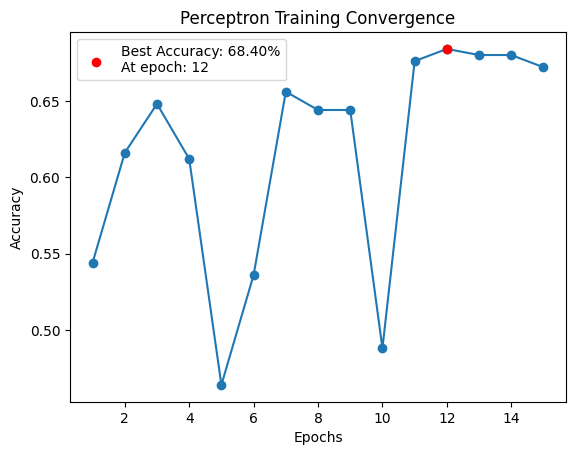

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Define a function to calculate accuracy
def calculate_accuracy(weights, threshold, X, y):
    correct_predictions = 0
    for i in range(len(X)):
        prediction = perceptron_predict(weights, threshold, X[i])
        if prediction == y[i]:
            correct_predictions += 1
    return correct_predictions / len(X)

# Train the perceptron on the training data and record accuracy at each epoch
epochs = 15
learning_rate = 0.001

# epochs = 15
# learning_rate = 1

# epochs = 25
# learning_rate = 0.0000001


accuracies = []
trained_weights_ = []
trained_threshold_ = []

for epoch in range(epochs):
    trained_weights, trained_threshold = perceptron_train(X_train,y_train,epoch, learning_rate)
    accuracy = calculate_accuracy(trained_weights, trained_threshold, X_test, y_test)
    trained_weights_.append(trained_weights)
    trained_threshold_.append(trained_threshold)
    accuracies.append(accuracy)

# Find the epoch with the highest accuracy
best_epoch = np.argmax(accuracies)
best_accuracy = accuracies[best_epoch]

# Plot the accuracy over epochs
plt.plot(range(1, epochs + 1), accuracies, marker='o')
plt.scatter(best_epoch + 1, best_accuracy, color='red', label=f'Best Accuracy: {best_accuracy:.2%}\nAt epoch: {best_epoch + 1}', zorder=5)  # Mark the highest accuracy point in red
plt.title('Perceptron Training Convergence')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Accuracy: 68.40%


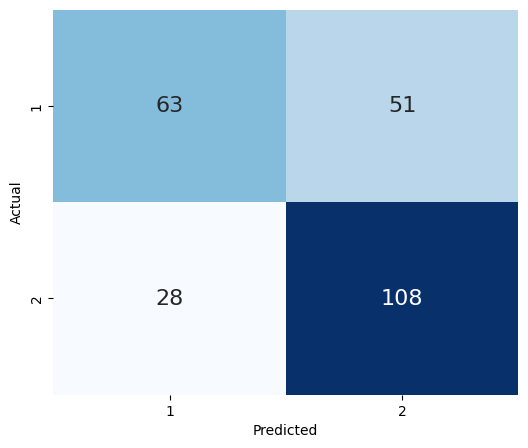

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_accuracy(cm):
    # True Positives (TP) are at cm[0][0], True Negatives (TN) at cm[1][1]
    # False Positives (FP) are at cm[0][1], False Negatives (FN) at cm[1][0]
    TP = cm[0][0]
    TN = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return accuracy


predictions = [perceptron_predict(trained_weights_[best_epoch], trained_threshold_[best_epoch], x) for x in X_test]
cm = confusion_matrix(y_test, predictions)


# Example usage
accuracy = calculate_accuracy(cm)
print(f"Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['1', '2'])
plt.yticks(ticks=[0.5, 1.5], labels=['1', '2'])
plt.show()

In [207]:
cm

array([[ 62,  52],
       [ 16, 120]], dtype=int64)

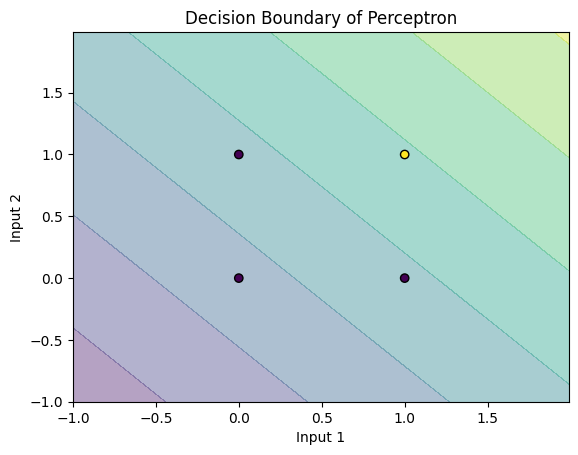

In [46]:
import numpy as np
import matplotlib.pyplot as plt

 

def initialize_weights(n_features):
    """ Initialize weights and bias to small random values """
    np.random.seed(42)
    weights = np.random.uniform(-0.1, 0.1, n_features + 1)  # Including bias as a weight
    return weights

def compute_output(weights, inputs):
    """ Compute the perceptron output """
    inputs_with_bias = np.insert(inputs, 0, 1)  # Insert 1 for bias multiplication
    return np.dot(inputs_with_bias, weights)

def train_perceptron(X, y, epochs, learning_rate):
    """ Train the perceptron using the Widrow-Hoff delta rule """
    n_features = X.shape[1]
    weights = initialize_weights(n_features)

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            inputs = X[i]
            desired_output = y[i]
            actual_output = compute_output(weights, inputs)

            # Calculate error (delta)
            error = desired_output - actual_output

            # Update weights
            weights += learning_rate * error * np.insert(inputs, 0, 1)  # Update with bias term

    return weights

def plot_decision_boundary(weights, X, y):
    """ Plot the decision boundary along with the data points """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = np.array([compute_output(weights, np.array([x, y])) 
                  for x, y in zip(np.ravel(xx), np.ravel(yy))])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title('Decision Boundary of Perceptron')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

# AND problem dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Training parameters
epochs = 20
learning_rate = 0.1

# Train the perceptron
trained_weights = train_perceptron(X, y, epochs, learning_rate)

# Plot decision boundary
plot_decision_boundary(trained_weights, X, y)


[0.000227, -0.00068988, -0.00067838]


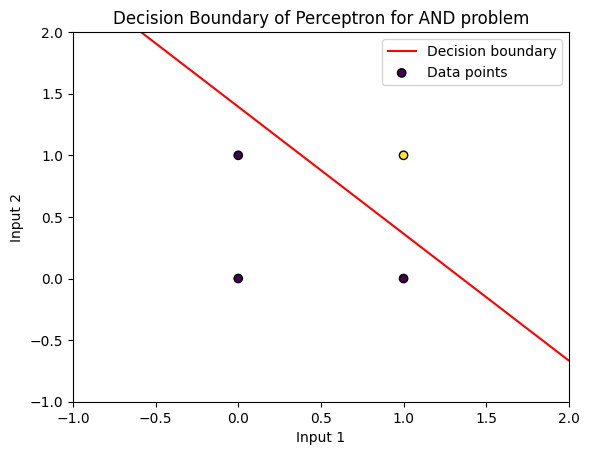

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron_train_widrow_hoff(X_train, y_train, epochs, learning_rate):
    weights = [ 0.000227,-0.00068988, -0.00067838]  # Including bias
    print(weights)

    for _ in range(epochs):
        for i in range(len(X_train)):
            x = np.insert(X_train[i], 0, 1)  # Add bias term to the input
            d = y_train[i]

            y = np.dot(weights, x)

            if d == 0:  # Class A
                delta = 0 - y
            elif d == 1:  # Class B
                delta = 1 - y

            weights += learning_rate * delta * x

    return weights

def plot_decision_boundary(weights, X, y):
    x_min, x_max = -1, 2
    y_min, y_max = -1, 2

    xx = np.linspace(x_min, x_max, 100)
    # Decision boundary: w0 + w1*x1 + w2*x2 = 0
    # Solving for x2: x2 = -(w0 + w1*x1) / w2
    yy = -(weights[0] + weights[1] * xx) / weights[2]

    plt.plot(xx, yy, 'r-', label='Decision boundary')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', label='Data points')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title('Decision Boundary of Perceptron for AND problem')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend()
    plt.show()

# AND problem dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # Adjusted output to 0 and 1

# Training parameters
epochs = 30
learning_rate = 0.00001

# Train the perceptron
trained_weights = perceptron_train_widrow_hoff(X, y, epochs, learning_rate)

# Plot decision boundary
plot_decision_boundary(trained_weights, X, y)


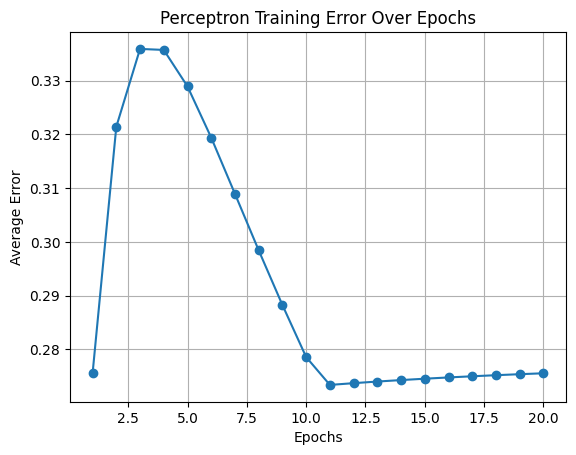

Input: [0 0], Output (rounded): 0
Input: [0 1], Output (rounded): 0
Input: [1 0], Output (rounded): 0
Input: [1 1], Output (rounded): 1


In [53]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_weights(n_features):
    """ Initialize weights and bias to small random values """
    np.random.seed(42)  # for reproducibility
    weights = np.random.uniform(-0.1, 0.1, n_features)
    bias = np.random.uniform(-0.1, 0.1)
    return weights, bias

def compute_output(weights, bias, inputs):
    """ Compute the perceptron output """
    return np.dot(inputs, weights) + bias

def train_perceptron(X, y, epochs, learning_rate):
    """ Train the perceptron using the Widrow-Hoff delta rule """
    n_features = X.shape[1]
    weights, bias = initialize_weights(n_features)
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(X.shape[0]):
            inputs = X[i]
            desired_output = y[i]
            actual_output = compute_output(weights, bias, inputs)
            
            # Calculate error (delta)
            error = desired_output - actual_output
            total_error += abs(error)

            # Update weights and bias
            weights += learning_rate * error * inputs
            bias += learning_rate * error
        errors.append(total_error / X.shape[0])
    
    return weights, bias, errors

# AND problem dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # input pairs
y = np.array([0, 0, 0, 1])  # corresponding outputs for AND operation

# Training parameters
epochs = 20
learning_rate = 0.1

# Train the perceptron
trained_weights, trained_bias, errors = train_perceptron(X, y, epochs, learning_rate)

# Plotting the errors over epochs
plt.plot(range(1, epochs + 1), errors, marker='o')
plt.title('Perceptron Training Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Average Error')
plt.grid(True)
plt.show()

# Optional: Test the perceptron
for inputs in X:
    output = compute_output(trained_weights, trained_bias, inputs)
    print(f"Input: {inputs}, Output (rounded): {int(round(output))}")



In [ ]:
# def perceptron_train(data, epochs, learning_rate, alpha, regularization_type="L2"):
#     weights, threshold = initialize_weights(data)
    
#     for _ in range(epochs):
#         for index, row in data.iterrows():
#             x = np.array(row)
#             d = row[-1]

#             y = np.dot(weights, x) + threshold

#             if y >= 0:
#                 if d == 2:  # Class B (output should be 0)
#                     if regularization_type == "L1":
#                         weights = weights - learning_rate * x + alpha * np.sign(weights)
#                     elif regularization_type == "L2":
#                         weights = weights - learning_rate * x - 2 * alpha * weights
#             else:
#                 if d == 1:  # Class A (output should be 1)
#                     if regularization_type == "L1":
#                         weights = weights + learning_rate * x - alpha * np.sign(weights)
#                     elif regularization_type == "L2":
#                         weights = weights + learning_rate * x - 2 * alpha * weights

#     return weights, threshold